In [1]:
import sys
sys.path.append("./../helper/") 

from temporal_networks import *

Loading ..\counting\wos-soc-limitedtitles-cooc from disk...
Loading ..\counting\wos-econ-limitedtitles-cooc from disk...
663 663 terms from soc, econ


In [2]:
import networkx as nx

In [3]:
YMIN, YMAX, YSTEP, YWINDOW = 1950, 2010, 5, 10

# let's take a look

excluding the focal node, what do these look like?

In [4]:
# some global params
# these might be better suited as parameters to this function...
# also, rows can be computed from columns + tn.shape[0]...
scale = 20
cols = 3
rows = 4

def plot_tnetworks(tn):
    
    # first generate all the Gs
    # so we can position everything the same across time slices

    G_master = nx.Graph()
    Gs = []

    for yi in range(tn1.shape[0]):
        G = nx.Graph()
        edges = np.argwhere(tn1[yi,:,:]>0)
        wedges = [
            (
                cc_soc.terms[e[0]], 
                cc_soc.terms[e[1]], 
                tn1[yi, e[0], e[1]]
            )
            for e in edges
        ]

        G.add_weighted_edges_from(wedges)
        Gs.append(G)

        # for positioning purposes
        G_master.add_edges_from([x[:2] for x in wedges])
    
    #pos = nx.spring_layout(G_master)
    #pos = nx.graphviz_layout(G_master, 'neato') # doesn't seem to exist anymore
    pos = nx.fruchterman_reingold_layout(G_master)
    
    xlim = (lambda x:(x.min(),x.max()))( np.array([x[0] for x in pos.values()]) )
    ylim = (lambda x:(x.min(),x.max()))( np.array([x[1] for x in pos.values()]) )

    # expand a little bit to fit the labels...
    def exp(lim):
        ext = lim[1]-lim[0]
        return [
            lim[0] - ext*0.1,
            lim[1] + ext*0.1
        ]

    xlim = exp(xlim)
    ylim = exp(ylim)

    fig = plt.figure(figsize=(scale, scale*rows/cols))
    for i in range(tn.shape[0]):
        plt.subplot(rows,cols,i+1)
        G = Gs[i]

        if not len(G.edges):
            continue

        edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

        nx.draw(G, with_labels=True, pos=pos, edgelist=edges, edge_color=np.log(weights), width=5.0, edge_cmap=plt.cm.Blues, node_size=0)
        plt.xlim(*xlim)
        plt.ylim(*ylim)

        plt.title( YMIN + YSTEP*i )

    if False:
        # also, after all that, it's quite ugly and not serving any purpose

        # why is putting a scale here so difficult o.o
        # this all is about trying to make it appreciate the log scale I'm working with
        import matplotlib.colors as colors
        vmin, vmax = (lambda x:(x.min(), x.max()))(np.array(weights))
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=colors.LogNorm(vmin = vmin, vmax=vmax))
        sm._A = []

        # and this bit gives one colorbar for all subplots
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

        plt.colorbar(sm, cax=cbar_ax)

# behavior

In [5]:
focal = 'behavior'

In [6]:
# taking the top 20 is only one way to do it
tn1 = get_full_tnets(cc_soc, focal, topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW, include_ego=False)
tn2 = get_full_tnets(cc_econ, focal, topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW, include_ego=False)

max accepted p-value: 0.006770463219963547


./../helper\temporal_networks.py:138: RuntimeWarning: invalid value encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.0001012172929524744


In [26]:
# alternatively, take a p-value cutoff.
#tn1 = get_full_tnets(cc_soc, focal, pcut=0.001, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)
#tn2 = get_full_tnets(cc_econ, focal, pcut=0.001, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW)

max accepted p-value: 0.00047366836788120576
max accepted p-value: 6.787026305894048e-07


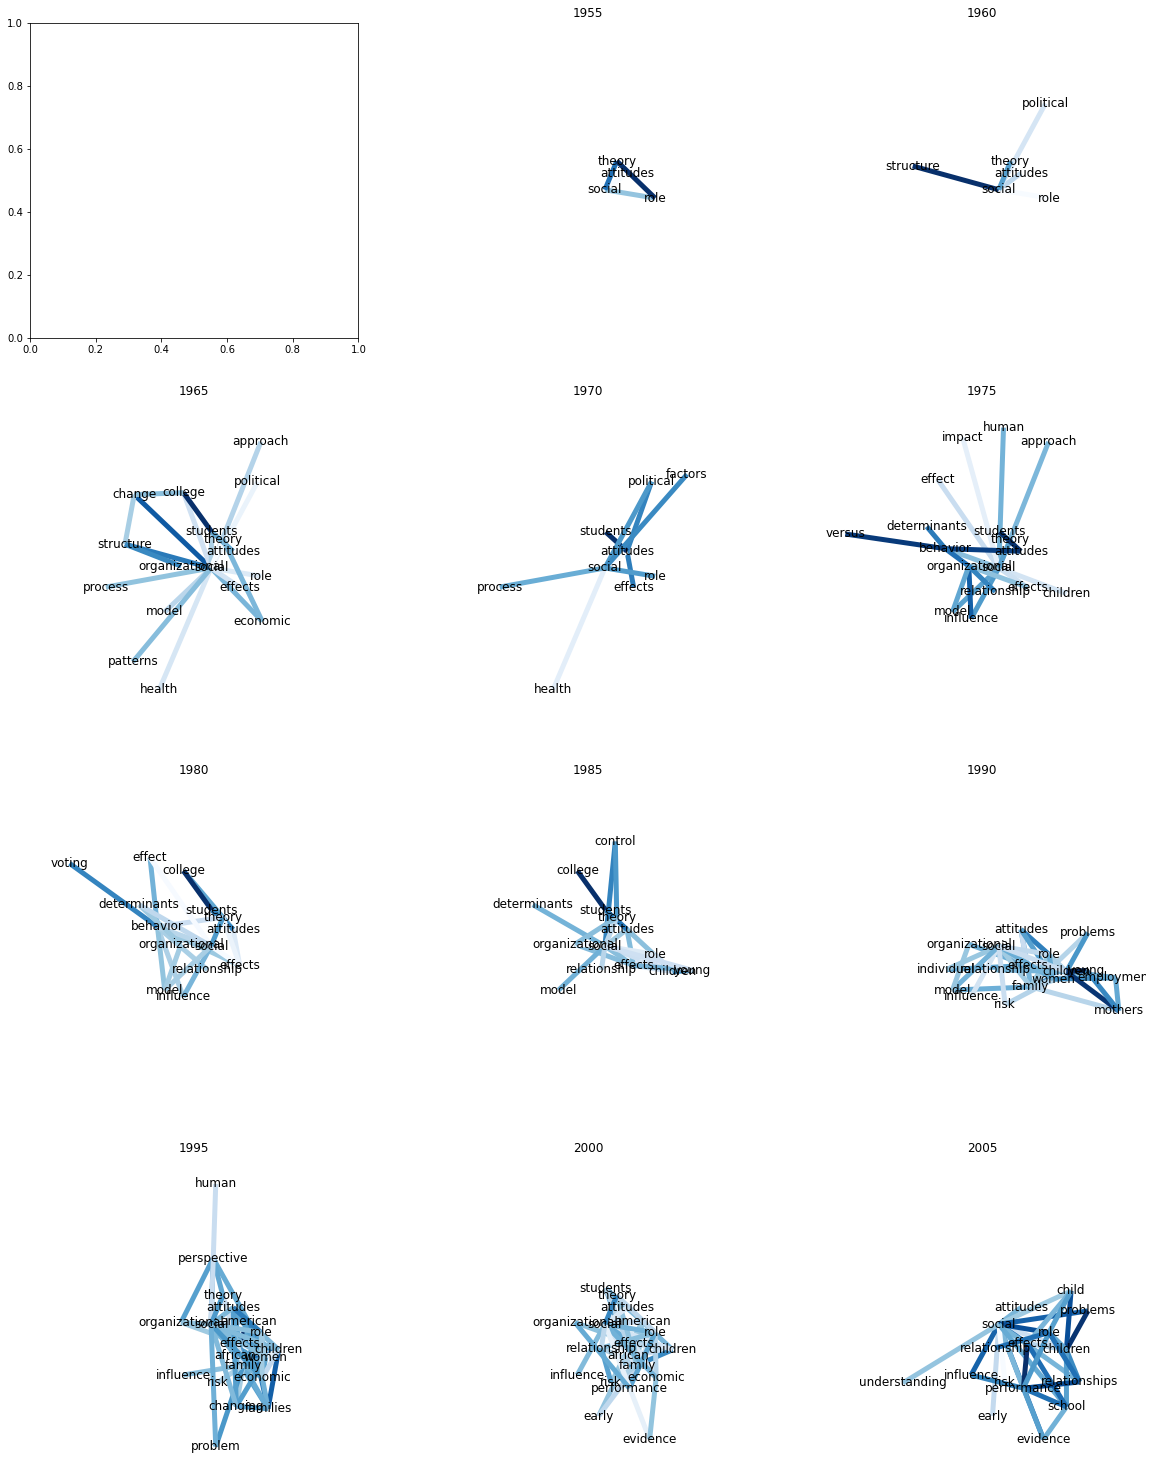

In [7]:
plot_tnetworks(tn1)

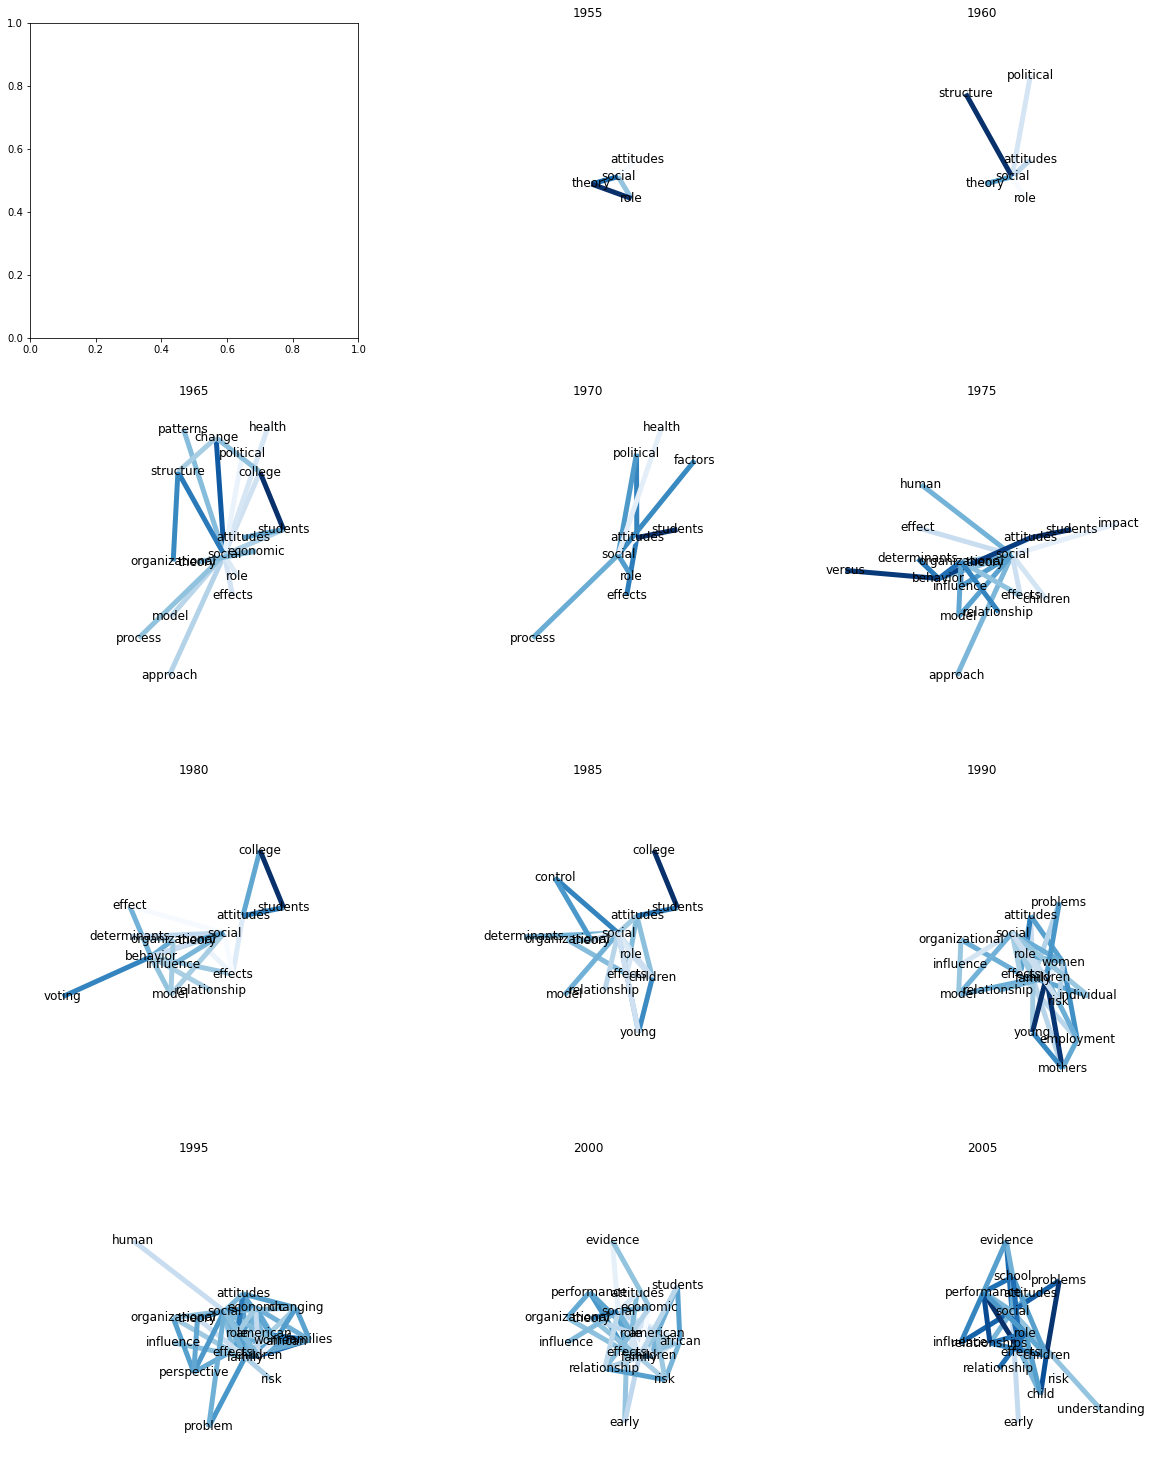

In [9]:
plot_tnetworks(tn2)

# behavior

In [10]:
focal = 'family'

In [11]:
# taking the top 20 is only one way to do it
tn1 = get_full_tnets(cc_soc, focal, topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW, include_ego=False)
tn2 = get_full_tnets(cc_econ, focal, topN=20, YMIN=YMIN, YMAX=YMAX, YSTEP=YSTEP, YWINDOW=YWINDOW, include_ego=False)

max accepted p-value: 0.00010353515303437021


./../helper\temporal_networks.py:138: RuntimeWarning: divide by zero encountered in log
  mat = -np.log( mat )


max accepted p-value: 0.30992275055500706


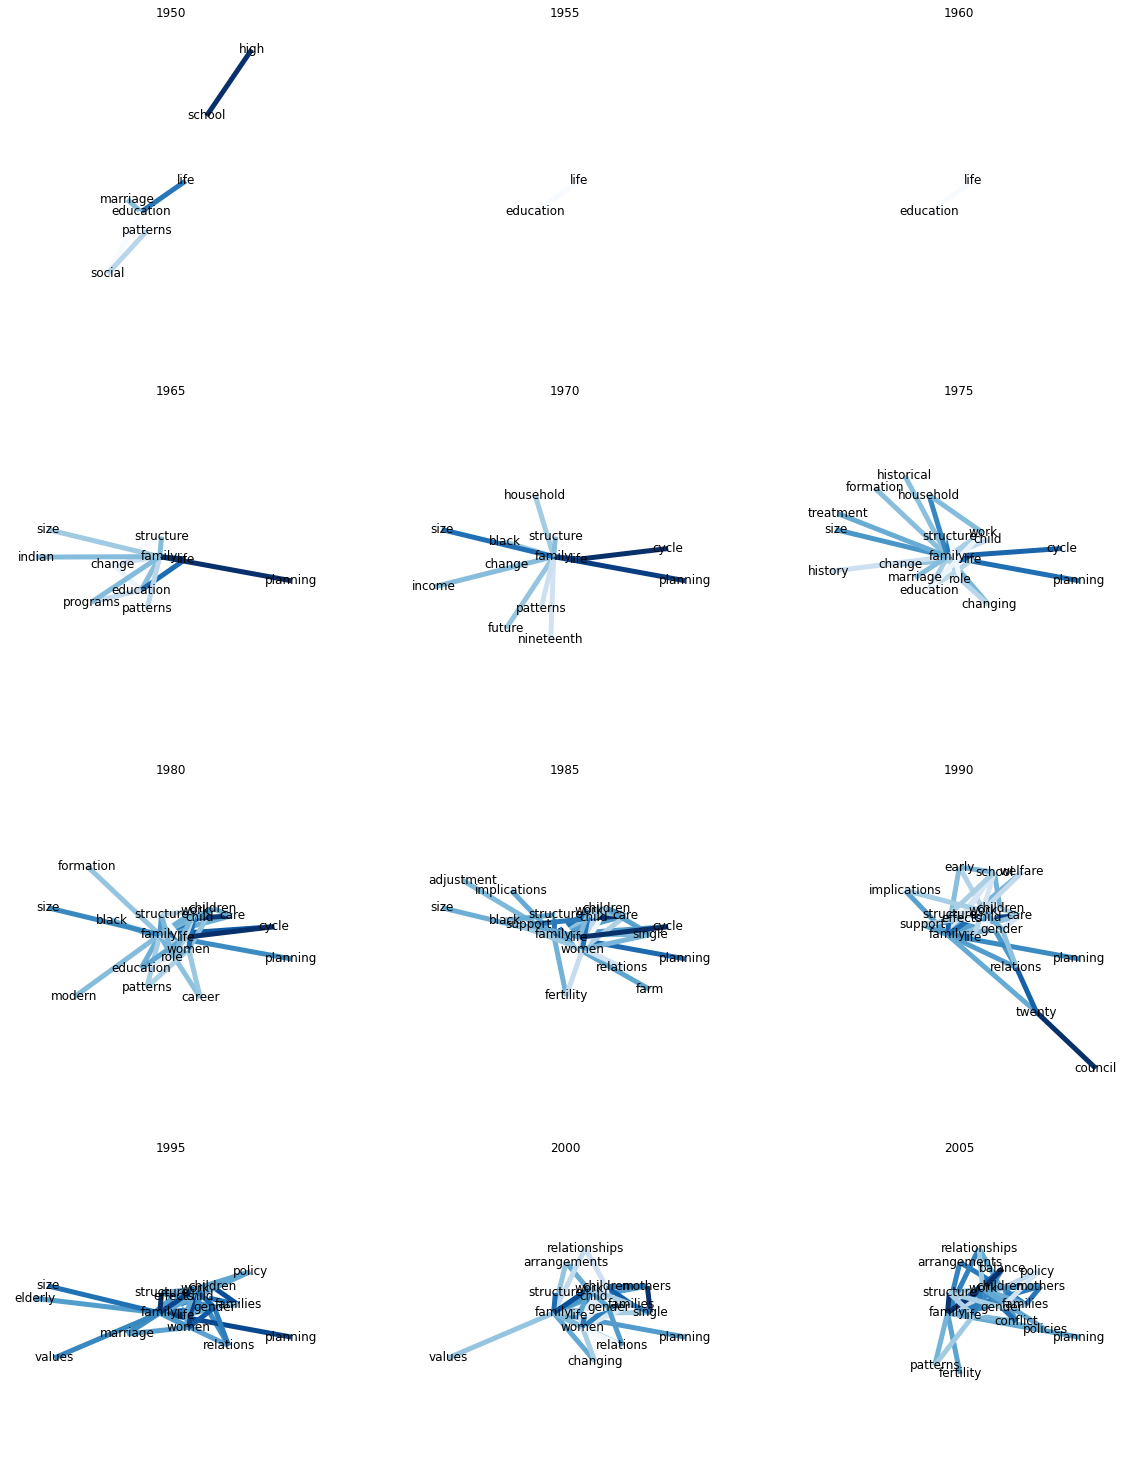

In [12]:
plot_tnetworks(tn1)

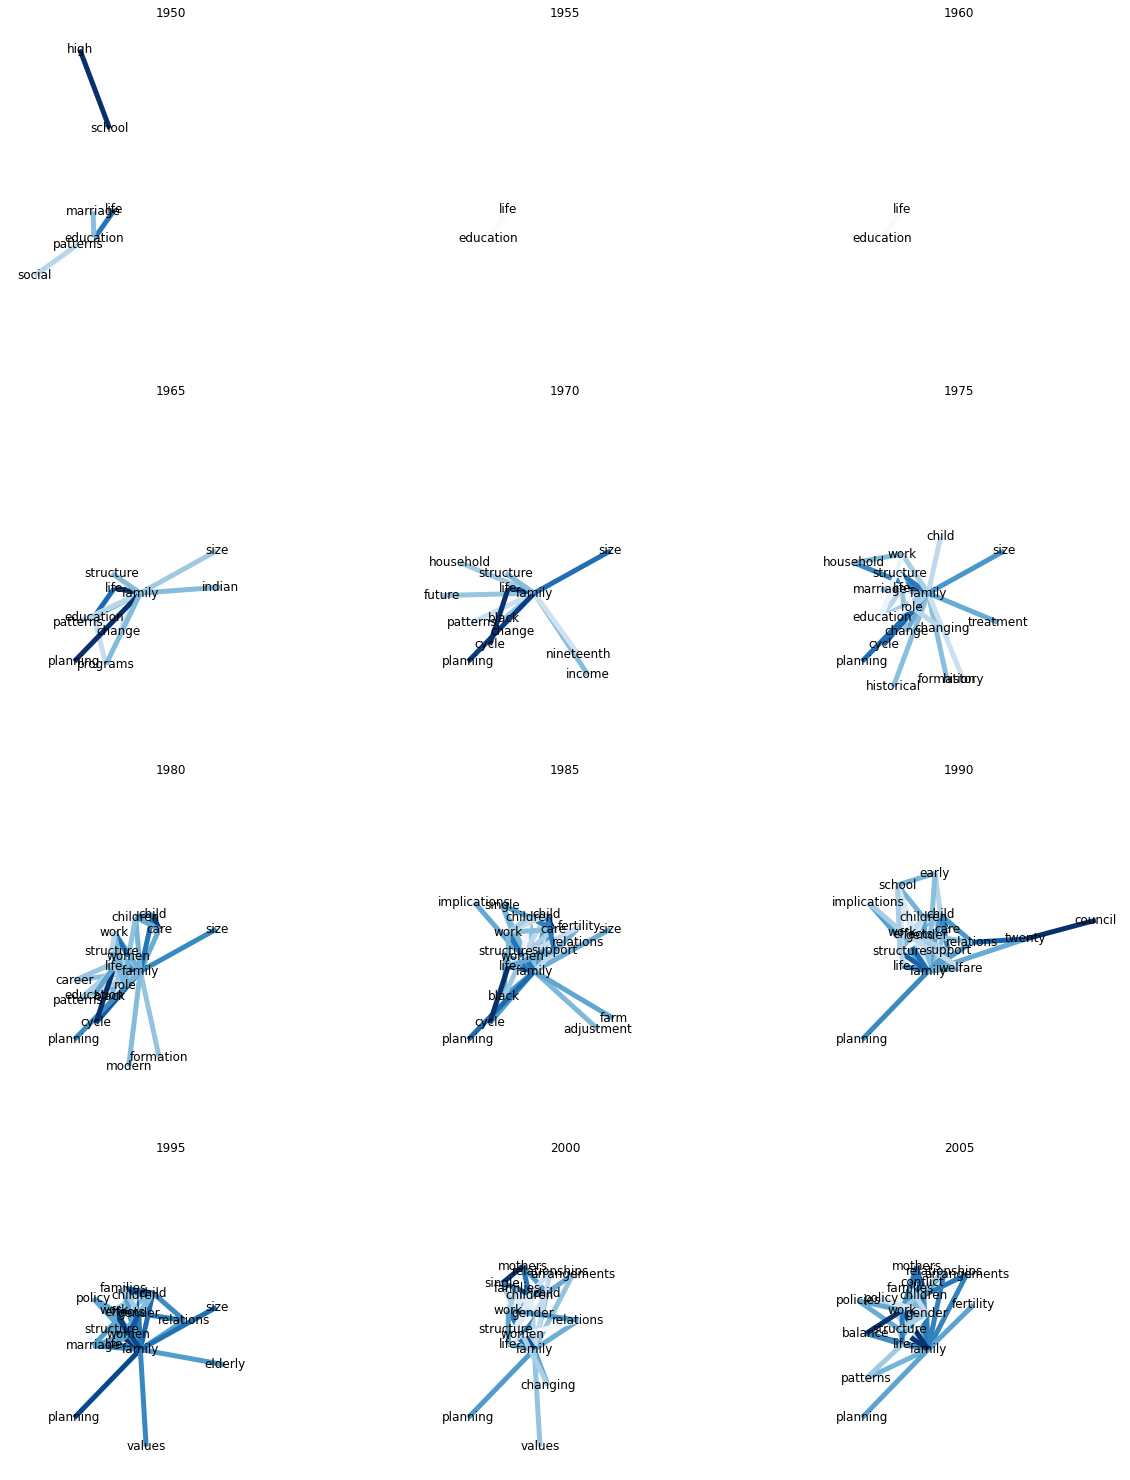

In [13]:
plot_tnetworks(tn2)